# Macros

## Overview:
- **Teaching:** 25 min
- **Exercises:** 15 min

**Objectives**
- Understand what a $\LaTeX$ macro is, and a few of their uses
- To be able to define your own macros

## Imagine if you will...

Suppose you have spent the past 3 months labouring over a wonderful paper you're planning to submit to a prestigous journal, and are just waiting on your supervisor's comments before pushing the button and sending it off.
Your supervisor gets back to you and approves of everything, sure it's over 30 pages long, but every single one of those pages is necessary.
There's just a couple of comments:
1. In some places you've used $\nabla^2$ for the laplacian, and in others you've used $\Delta$,
1. You've used the variable $\mu$ for both the viscosity of a fluid _and_ the mean value of it's stochastic distribution,
1. There are some hanging brackets, and brackets of the wrong size, in a number of places.

Then comes the dread realisation when you realise you're going to have to do the following to fix these issues;
1. This one isn't too bad you think, I can just do a CTRL+F (find and replace) in my .tex file to find every instance of $\Delta$, and replace it with $\nabla^2$. Of course, I'm going to have to manually check that I'm replacing the right things in the right place as I go, but this isn't too bad.
1. This one is going to be a pain - you can't just find and replace _every_ instance of $\mu$, because half of them are correct! You're going to have to first decide on a new variable, then go through every instance of $\mu$ using the "find in text" feature, determine manually if it needs replacing or not, then replace it, and repeat for the whole document!
1. At this point you get fed up - how on earth are you going to find _every_ set of mismatched brackets? And once you do, how do you know the correct size you should make them so that they fit around the expression they contain? What if you need to find an instance where you've used a `(` on the left but a `]` on the right? The list goes on...

## Setup+:

Below is some sample text that illustrates the above problems, albeit on a much smaller scale (it's only one paragraph, with one instance of each problem).
However, this will be enough for our purposes - feel free to write your own example text, or copy this into the body of the document you are working with.

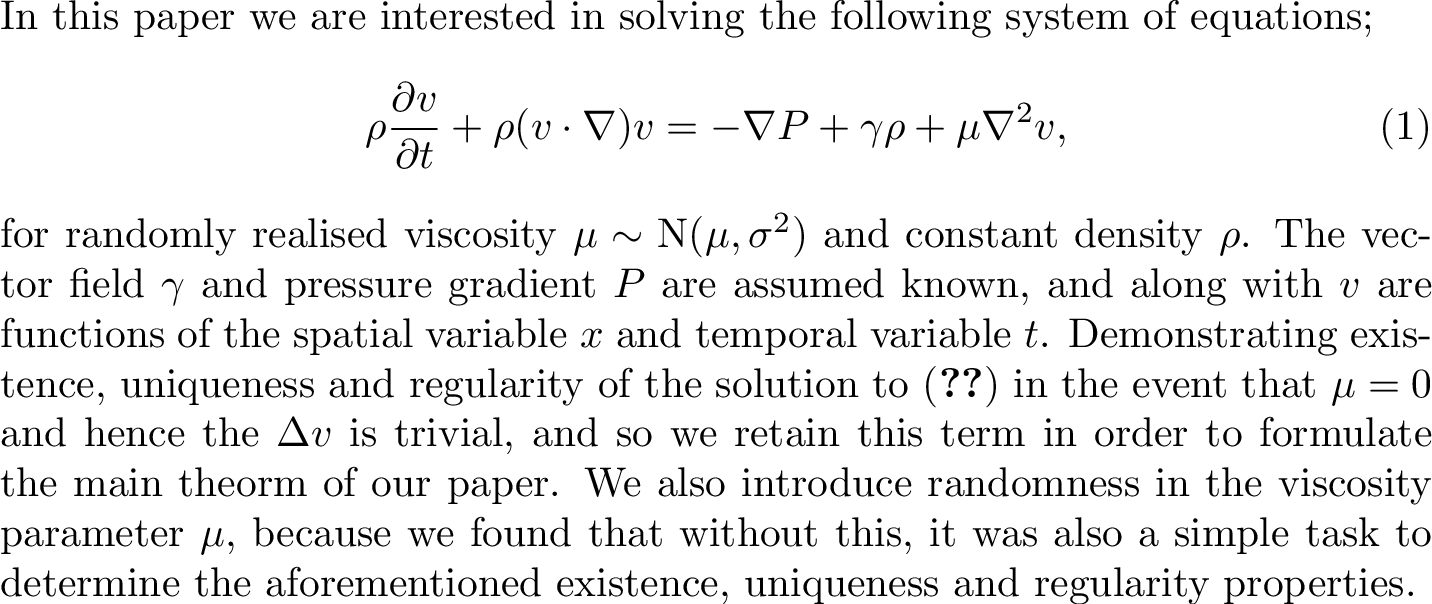

In [1]:
%%pdflatex
In this paper we are interested in solving the following system of equations;
\begin{align} \label{eq:NSEqn}
    \rho\dfrac{\partial v}{\partial t} + \rho (v\cdot\nabla)v &= -\nabla P + \gamma \rho + \mu \nabla^2 v,
\end{align}
for randomly realised viscosity $\mu\sim\mathrm{N}(\mu, \sigma^2)$ and constant density $\rho$.
The vector field $\gamma$ and pressure gradient $P$ are assumed known, and along with $v$ are functions of the spatial variable $x$ and temporal variable $t$.
Demonstrating existence, uniqueness and regularity of the solution to \eqref{eq:NSEqn} in the event that $\mu=0$ and hence the $\Delta v$ is trivial, and so we retain this term in order to formulate the main theorm of our paper.
We also introduce randomness in the viscosity parameter $\mu$, because we found that without this, it was also a simple task to determine the aforementioned existence, uniqueness and regularity properties.

__NOTE__: Remember that you'll need to run $\LaTeX$, then BibLaTeX, then $\LaTeX$ again to get the equation numbers to appear!

:Setup+

## There must be a better way...

In the text above, there is at least one instance of each problem that we highlighted;
1. We have used $\nabla^2 v$ in the equation, but $\Delta v$ in the text,
1. $\mu$ appears as both the viscosity and the mean value of that quantity,
1. The brackets surrounding the normal distribution's parameters $(\mu, \sigma^2)$ do not fully scale to the height of the superscript 2.

Each of these problems could have been addressed before, or during, the creation of the document.
They are all matters of ensuring consistency when repeating a simple task or layout format, if we could standardise our variables, or how our brackets are drawn, we could use that standard each time.
Of course, even deciding on a convention from the get-go and manually typing can still introduce errors, but what we can do instead is define a $\LaTeX$ *macro*, which encapsulates our decided-upon convention and repeats it without fail (because computers and all that).

## Information: What's a Macro?

You can think of a macro like a function, in the same way as you think of functions in a programming language like Python or MATLAB - it takes in a number of inputs (possibly zero), performs a series of actions, and returns an output.

For those who are concerned with fine details, macros in $\LaTeX$ aren't quite functions, you should instead think of a macro as "inserting" the code that the macro is sceduled to run directly into your course code, whenever the macro is referenced.
The command `\mu` can be thought of as "the macro that inserts the code to generate a $\mu$ character", for example.
In the same way, defining a macro called `myMacro` will insert the code you provide to the macro into your source code whenever you type `\myMacro`.

We can define macros to do a wide variety of tasks, beyond what we will be using them for here.
But this example encapsulates one of the most useful techniques when writting documents.

That is, we can use a macro to ensure we always write $\nabla^2$, rather than mixing in some $\Delta$s everywhere.
We can also use macros to label our variables, which means that we can change the symbol we use for each of our variables simply by *changing only the macro*, and rerending the document!
Similar ideas apply to brackets and other complex expressions that we want to write, as we will see below.

## Creating our own Macro

You can define a macro anywhere using the `newcommand` $\LaTeX$ command, but it is typically recommended you define your macros in the preamble, *after* importing packages.

The `\newcommand` command has the following syntax: <br />
`\newcommand{\macroName}[nArgs]{macro code}`

- `\macroName` is the name that you want to give to, and use to refer to, your macro.
- `nArgs` is an integer, which is the number of arguments that your macro takes in. If your macro doesn't take any arguments, then you can omit the `[0]`.
- `macro code` is the $\LaTeX$ code or prose that your macro will insert whenever it is called. You can refer back to positional arguments using the hastag (`#`) if your macro takes more than 0 arguments.

In the example text above, we can define several macros that will help.
Consider the same example above, but now using some additional macros.

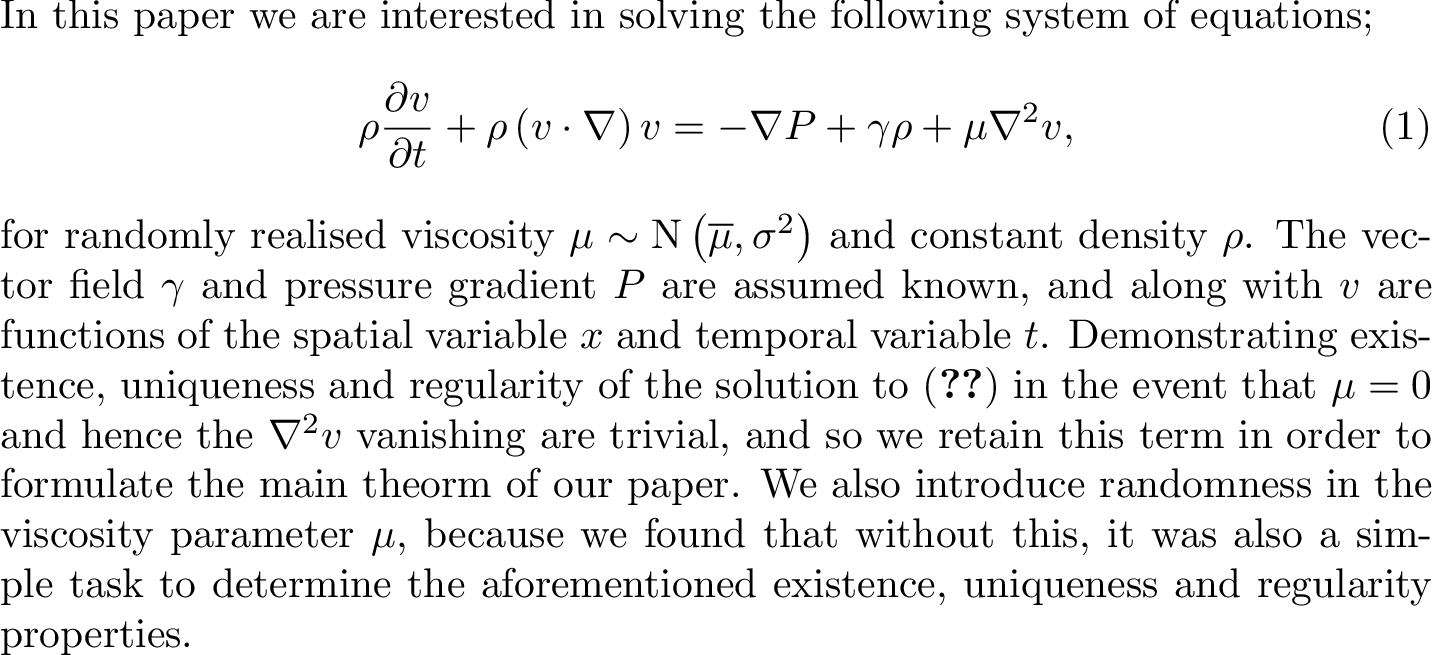

In [2]:
%%pdflatex
\newcommand{\viscosity}{\mu}
\newcommand{\viscosityMean}{\overline{\mu}}
\newcommand{\laplacian}{\nabla^2}
\newcommand{\bracs}[1]{\left( #1 \right)}

In this paper we are interested in solving the following system of equations;
\begin{align} \label{eq:NSEqn}
    \rho\dfrac{\partial v}{\partial t} + \rho \bracs{v\cdot\nabla}v &= -\nabla P + \gamma \rho + \viscosity \laplacian v,
\end{align}
for randomly realised viscosity $\viscosity\sim\mathrm{N}\bracs{\viscosityMean, \sigma^2}$ and constant density $\rho$.
The vector field $\gamma$ and pressure gradient $P$ are assumed known, and along with $v$ are functions of the spatial variable $x$ and temporal variable $t$.
Demonstrating existence, uniqueness and regularity of the solution to \eqref{eq:NSEqn} in the event that $\viscosity=0$ and hence the $\laplacian v$ vanishing are trivial, and so we retain this term in order to formulate the main theorm of our paper.
We also introduce randomness in the viscosity parameter $\viscosity$, because we found that without this, it was also a simple task to determine the aforementioned existence, uniqueness and regularity properties.

You'll notice that 3 of our macros don't take input arguments - this is because we are using the macro to standardise the symbol (or combination of symbols for `\laplacian`) we are going to be using for a given quantity in the text.
Indeed, whenever we type `\viscosity` into the source code, we will have a $\mu$ printed, `\laplacian` will produce $\nabla^2$, and `\viscosityMean` will produce $\overline{\mu}$.

Our final macro is what standardises our brackets, and it takes in a single input argument.
We can call it by typing `\bracs{input argument}` - the macro then takes whatever we wrote in `input argument`, looks up the definition of `\bracs` by finding it's `\newcommand` call, inserts `input argument` in place of `#1` in our definition, and then places all that back into our code!
As such, the small segment of code `\bracs{v\cdot\nabla}` is identical to typing `\left(v\cdot\nabla\right)` directly into our source code, and saves us the hassle of manually inserting the `\left(` and `\right)`.


## Information: Good Macro Practice

For long documents, it is generally a good idea to create one macro for every significant property or common expression that you find yourself using.
These might include:
- Any constants that appear commonly in equations, or that have a name and a standard symbol for their use in the literature. These are things like the viscosity in fluid dynamics (macro above), or if you were studying wave propagation you might have a macro `\wavelength` which standardises the symbol you're using for the wavelength, EG <br /> `\newcommand{\wavelength}{\lambda}`.
- For any expression you find yourself repeatedly typing, and which is somewhat cumbersome. Things like the `\bracs` macro would be classed in here. You might also include certain sets, for example <br /> `\newcommand{\ltwo}[2]{L^2\left(#1 \rightarrow #2 \right)}`. <br /> Try try this out using `\ltwo{\arg1}{\arg2}` to see what it does!

Like with all things, there is a balance that needs to be struck here; you don't want to make your document *entirely* macros.
A good balance is that you should be able to "read" your source code as you would "think" it, and this is another reason behind coming up with a naming convention for macros.
Choosing to label the macro which defines the symbol for viscosity `viscocity`  is a good choice, because you can *read* the line `in the event that $\viscosity=0$` in the same way as you would "think it" in your head.

## Information: What's in a Macro?

You'll notice that most of the macros we have defined here are shortcuts for when you are working in `math` environments, and they help deal with mathematical notation and expressions.
Macros are not limited to just math mode; you could have a macro that changed the text to a particular colour, writes out a phrase you commonly shorten to an acronym (`\newcommand{\PDE}{Partial Differential Equation}`), or inserts a random picture of a cat into the document from a google search.

That being said, you'll rarely need to define such macros, and if you do they follow the exact same pattern as above, and use the `\newcommand` command again.

## Exercise: Using Macros

Take the macros that have been defined, and the prose below, and insert them into your document.
```
\newcommand{\viscosity}{\mu}
\newcommand{\viscosityMean}{\overline{\mu}}
\newcommand{\laplacian}{\nabla^2}
\newcommand{\bracs}[1]{\left( #1 \right)}
```

Prose:
```
In this paper we are interested in solving the following system of equations;
\begin{align} \label{eq:NSEqn}
    \rho\dfrac{\partial v}{\partial t} + \rho \bracs{v\cdot\nabla}v &= -\nabla P + \gamma \rho + \viscosity \laplacian v,
\end{align}
for randomly realised viscosity $\viscosity\sim\mathrm{N}\bracs{\viscosityMean, \sigma^2}$ and constant density $\rho$.
The vector field $\gamma$ and pressure gradient $P$ are assumed known, and along with $v$ are functions of the spatial variable $x$ and temporal variable $t$.
Demonstrating existence, uniqueness and regularity of the solution to \eqref{eq:NSEqn} in the event that $\viscosity=0$ and hence the $\laplacian v$ vanishing are trivial, and so we retain this term in order to formulate the main theorm of our paper.
We also introduce randomness in the viscosity parameter $\viscosity$, because we found that without this, it was also a simple task to determine the aforementioned existence, uniqueness and regularity properties.
```

Then perform the following tasks:
1. The variable $\rho$ is commonly known in the literature as the density (or fluid density). Create a macro that reflects this, and insert it into each of the relevant places in the document. Then, if you don't like $\rho$ very much, change the symbol that denotes the density to something else, and watch it update everywhere.
1. You have decided that you don't like the partial derivative being displayed as a fraction, and would much rather represent it using the shorthand notation $\partial_t v$. You also anticipate you'll be wanting to use this notation for the spatial partial derivatives too, and so decide you'd like a macro for that. Create such a macro, called `pDiff` (partial-differential) that takes in one argument $\alpha$ and produces the expression $\partial_{\alpha}$. Test that `\partial{t}v` and `\partial{x_1}v` produce what you expect, and replace the partial differential in the equation.
1. You think that you'll be using several normal distributions thoughout the paper, and so decide that it would be good to create a macro for that. Create a macro called `normDist` that takes two input arguments (the mean $\alpha$ and standard deviation $\beta$) and returns the expression $\mathcal{N}\left(\alpha, \beta^2\right)$, then replace the normal distribution used in the text. You may need the in built `\mathcal` command to generate the script $\mathcal{N}$.

## Solution+: Using Macros

You should have ended up with the following macros and prose:

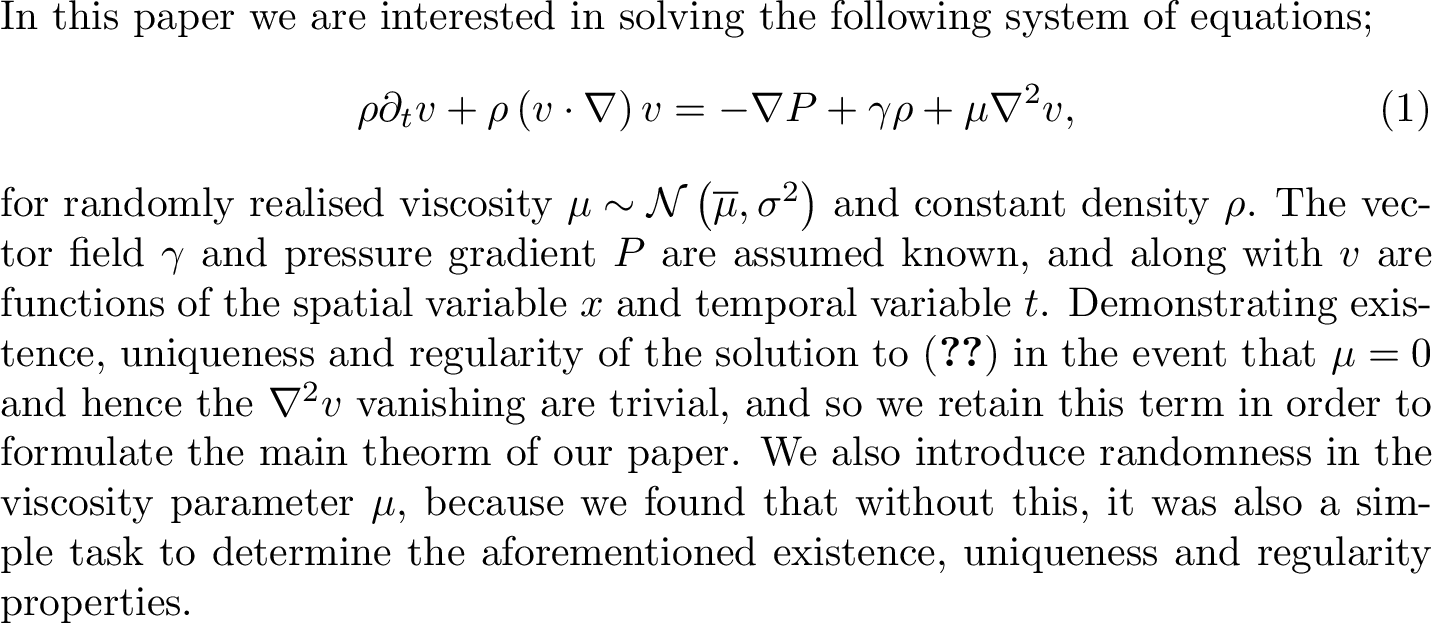

In [3]:
%%pdflatex
\newcommand{\viscosity}{\mu}
\newcommand{\viscosityMean}{\overline{\mu}}
\newcommand{\laplacian}{\nabla^2}
\newcommand{\bracs}[1]{\left( #1 \right)}
\newcommand{\density}{\rho} %or whatever you changed this to if you don't like rho!
\newcommand{\pdiff}[1]{\partial_{#1}} %notice that you need the curly-braces {} around #1, because you want the whole expression that is put in to be a subscript
\newcommand{\normDist}[2]{\mathcal{N}\left(#1, {#2}^2 \right)} %you could also use \bracs{#1, {#2}^2} if you were feeling lazy, too!
    
In this paper we are interested in solving the following system of equations;
\begin{align} \label{eq:NSEqn}
    \density\pdiff{t}v + \density \bracs{v\cdot\nabla}v &= -\nabla P + \gamma \density + \viscosity \laplacian v,
\end{align}
for randomly realised viscosity $\viscosity\sim\normDist{\viscosityMean}{\sigma}$ and constant density $\density$.
The vector field $\gamma$ and pressure gradient $P$ are assumed known, and along with $v$ are functions of the spatial variable $x$ and temporal variable $t$.
Demonstrating existence, uniqueness and regularity of the solution to \eqref{eq:NSEqn} in the event that $\viscosity=0$ and hence the $\laplacian v$ vanishing are trivial, and so we retain this term in order to formulate the main theorm of our paper.
We also introduce randomness in the viscosity parameter $\viscosity$, because we found that without this, it was also a simple task to determine the aforementioned existence, uniqueness and regularity properties.

:Solution+

# Key Points:
- A macro performs a similar role to that of a function in Python or MATLAB.
- A macro is created using the `newcommand` command.
- We can create macros to standardise our notation throughout a document, reduce the amount of times we have to type out a repeating expression, or create a standard format for the layout of our equations.